# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())
df.info()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1. Is the distribution of body temperatures normal?

In [146]:
# Compute mean and std:
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
print(mu, sigma)

98.24923076923078 0.7303577789050377


In [147]:
# Sampling out of normal distribution:
samples = np.random.normal(mu, sigma, 10000)

In [148]:
# A function to calculate ECDF:
def ecdf (data):
    x = np.sort(data)
    y = np.linspace(0,1, len(data), endpoint=False)
    return x, y

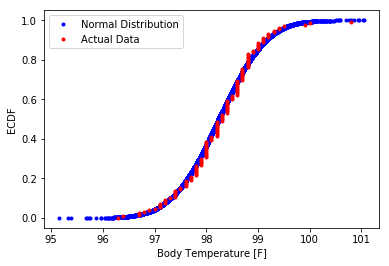

In [149]:
x_theor , y_theor = ecdf(samples)
x, y = ecdf (df.temperature)
_ = plt.plot(x_theor , y_theor, marker = ".", linestyle = "none", color = "blue")
_ = plt.plot(x , y, marker = ".", linestyle = "none", color = "red")
_ = plt.xlabel("Body Temperature [F]")
_ = plt.ylabel("ECDF")
_ = plt.legend(("Normal Distribution", "Actual Data"))
plt.show()

#### The ECDF plot confirms that the distribution of body temperature is normal.

### 2. Is the sample size large? Are the observations independent?

#### Sample size = 130 > 30. So the sample size is large. The obzervations are undependent since they are taken from different people and one person's body temperature is not affected by other people body temperatures.

### 3. Is the true population mean really 98.6 degrees F?

#### Would you use a one-sample or two-sample test? Why? 
I would use one-sample test because we only have one set of data.

#### In this situation, is it appropriate to use the t or  z statistic?
Since the number of sample is 130 which is greater than 30, we should use z-statistic. 


In [150]:
np.std(df.temperature)

0.7303577789050377

In [151]:
# Null hypothesis: the actual population mean is 98.6
# test statistic: z-statistic 
def z_stat (data, mu=98.6, sigma=0.7303577789050377):
    return ((np.mean(data)-mu)/sigma*np.sqrt(len(data)))

# Calculated z statistic for original data
z_stat_orig = z_stat(df.temperature)
    
# Define bootstrapping functions
def bootstrap_replicate_1d(data, func):
    return (func(np.random.choice(data, size=len(data))))

# Draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_reps[i] = bootstrap_replicate_1d(data, func)
        
    return bs_reps   

# Assume the actual mean of data is 98.6. So we create shifted data:

shidted_temp = df.temperature - np.mean(df.temperature) + 98.6

# Draw bootsrap replicates from the data:
z_replicates = draw_bs_reps(shidted_temp, z_stat, size = 10000)

p_z = np.sum(np.abs(z_replicates) >= np.abs(z_stat_orig))/len(z_replicates)

print('z-statistic for the original data:', z_stat_orig)
print("p-value: ", p_z)

z-statistic for the original data: -5.47592520208
p-value:  0.0


#### The p-value is zero. So the probability of having a mean of 98.6 in all 10000 trials is zero. So we reject the null hypothesis. The population mean is not 98.6

In [152]:
# We repeat the same calculation with t-statistic
# Null hypothesis: the actual population mean is 98.6
# test statistic: t-statistic 
def t_stat (data, mu=98.6):
    return ((np.mean(data)-mu)/np.std(data)*np.sqrt(len(data)))

# Calculated t statistic for original data
t_stat_orig = t_stat(df.temperature)

# Draw bootsrap replicates from the data:
t_replicates = draw_bs_reps(shidted_temp, t_stat, size = 10000)

p_t = np.sum(np.abs(t_replicates) >= np.abs(t_stat_orig))/len(t_replicates)

print('t-statistic for the original data:', t_stat_orig)
print("p-value: ", p_t)
    



t-statistic for the original data: -5.47592520208
p-value:  0.0


#### The results of t-statistic and z-statistic are the same. This is because the number of sample points are high and also since we do not have the population std, we had to estimate it with the sample std in both cases.

### 4. Draw a small sample of size 10 from the data and repeat both tests.
#### Which one is the correct one to use?
Since the sample size is smaller than 30 and the population std is unknown, the t-statistic should be used.

In [153]:
# Resampling a small sample of size 10 from the data:
small_data = np.random.choice(df.temperature, size = 10)

# We repeat the same calculation with t-statistic with this small sample
# Null hypothesis: the actual population mean is 98.6
# test statistic: t-statistic 

# Assume the actual mean of data is 98.6. So we create shifted data:

shidted_temp_small = small_data - np.mean(small_data) + 98.6

# Calculated t statistic for original data
t_stat_orig_small = t_stat(small_data)

# Draw bootsrap replicates from the data:
t_replicates_small = draw_bs_reps(shidted_temp_small, t_stat, size = 10000)

p_t_s = np.sum(np.abs(t_replicates_small) >= np.abs(t_stat_orig_small))/len(t_replicates_small)

print('t-statistic for the n=10 data:', t_stat_orig_small)
print("p-value for n=10 data: ", p_t_s)


t-statistic for the n=10 data: -2.41407837668
p-value for n=10 data:  0.0647


In [154]:
# We repeat the same calculation with z-statistic with the small sample
# Null hypothesis: the actual population mean is 98.6
# test statistic: z-statistic 

# Calculated z statistic for original data
z_stat_orig_small = z_stat(small_data)

# Draw bootsrap replicates from the data:
z_replicates_small = draw_bs_reps(shidted_temp_small, z_stat, size = 10000)

p_z_s = np.sum(np.abs(z_replicates_small) >= np.abs(z_stat_orig_small))/len(z_replicates_small)

print('z-statistic for the n=10 data:', z_stat_orig_small)
print("p-value for n=10 data: ", p_z_s)


z-statistic for the n=10 data: -1.34222719736
p-value for n=10 data:  0.0168


#### What do you notice? What does this tell you about the difference in application of the  t and  z statistic?
Since the number of samples is small, t and z statistics produce different results. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
#### Start by computing the margin of error and confidence interval.

In [155]:
# Calculate the mean bootstrap replicates from the data:

bs_reps = draw_bs_reps(df.temperature, np.mean, size =10000)

# Calculate 95% confidence interval:
a, b = np.percentile(bs_reps, [2.5, 97.5])

print("low and high confidence intervals: ", a, b)

margin_error = (b-a)/2

print("Margin of error for 95% confidence interval: ", margin_error)


low and high confidence intervals:  98.1199807692 98.3769423077
Margin of error for 95% confidence interval:  0.128480769231


#### So 99% of people have temperatures between these two values. So if someone temperature is out of this range, that should be considered abnormal.

### 6. Is there a significant difference between males and females in normal temperature?
#### What test did you use and why?
We can use permutation since we are having two sample and we will do hypothesis test on them
#### Write a story with your conclusion in the context of the original problem.

In [156]:
temp_female = df.loc[df["gender"]== "F"]["temperature"]
temp_male = df.loc[df["gender"]== "M"]["temperature"]

In [160]:
# Null hypothesis: There is no difference between male and female temperature. 
# We will perfom permutation to asses this hypothesis. We set difference in mean as test statistics.

# A function to calculate difference of mean between two data:
def diff_mean(data1, data2):
    return np.abs(np.mean(data1) - np.mean(data2))

diff_mean_orig = diff_mean(temp_female, temp_male)

# Perform permutation replicates:
def draw_perm_reps(data1, data2, func, size=1):
    data_all = np.concatenate((data1, data2))
    perm_reps = np.empty(size)
    for i in range(size):
        perm = np.random.permutation(data_all)
        data_perm_1 = perm[:len(data1)]
        data_perm_2 = perm[len(data1):]
        perm_reps[i] = func(data_perm_1, data_perm_2)
    return perm_reps   

diff_temp_perm_all = draw_perm_reps(temp_female, temp_male, diff_mean, 10000)

p_diff = np.sum(diff_temp_perm_all >= diff_mean_orig)/len(diff_temp_perm_all)

print("Observed temperature difference between female and male: ", diff_mean_orig )
print("p-value: ", p_diff)


Observed temperature difference between female and male:  0.289230769231
p-value:  0.0247


#### Since p-value is less than 0.05, we will reject the null hypothesis. There is a statistically significant difference between male and female body temperatures.

#### The mean normal body temperature was held to be 37 ∘C or 98.6 ∘F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, our calculations showed that this value for mean in not correct. With 95% confidence, we calculated that the human body temperature value is between  98.1199807692 and 98.3769423077 ∘F. 
#### We also showed that there is a significant difference between male and female body temperatures. In average, females have 0.289230769231 higher body temperature than males. 